# RNN

RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.

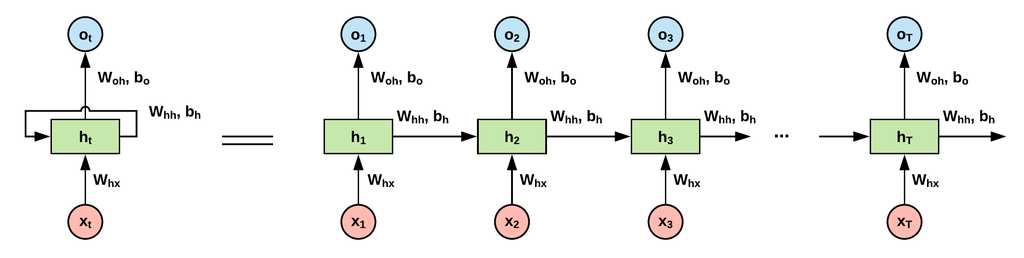

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd/content/gdrive/My Drive/Deep_learning_K&P

/content/gdrive/My Drive/Deep_learning_K&P


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam

import matplotlib.pyplot as plt

## 데이터 불러오기

In [4]:
df = pd.read_csv("./data/kospi.csv")

Open, High, Low, Close, Adj Close는 금액, Volume은 거래량으로 데이터의 단위가 다르다.

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,2183.489990,2206.199951,2177.879883,2206.199951,2206.199951,480400
1,2019-01-31,2222.879883,2222.879883,2201.219971,2204.850098,2204.850098,545200
2,2019-02-01,2211.929932,2218.780029,2201.409912,2203.459961,2203.459961,479400
3,2019-02-07,2215.770020,2215.790039,2196.770020,2203.419922,2203.419922,427800
4,2019-02-08,2192.010010,2192.479980,2171.959961,2177.050049,2177.050049,391000


MixMaxScaler를 통해서 데이터를 0과1사이로 scaling을 해준다.

In [6]:
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

MixMaxScaler를 통해서 데이터를 0과1사이로 scaling을 해준다.

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,0.722898,0.732351,0.745525,0.759235,2206.199951,0.242113
1,2019-01-31,0.763058,0.750069,0.769089,0.757866,2204.850098,0.274771
2,2019-02-01,0.751894,0.745714,0.769280,0.756456,2203.459961,0.241609
3,2019-02-07,0.755809,0.742538,0.764596,0.756415,2203.419922,0.215603
4,2019-02-08,0.731584,0.717777,0.739548,0.729669,2177.050049,0.197057


총 431개의 데이터 존재

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       431 non-null    object 
 1   Open       431 non-null    float64
 2   High       431 non-null    float64
 3   Low        431 non-null    float64
 4   Close      431 non-null    float64
 5   Adj Close  431 non-null    float64
 6   Volume     431 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.7+ KB


In [9]:
# Dataset
# 시가, 최고가, 최저가, 거래량 을 이용해서 종가(마지막으로 체결된 거개가격) 예측

X = df[['Open','High','Low','Volume']].values
y = df['Close'].values

특정일자로 부터 Sequence length 만큼의 데이터를 입력데이터로 설정하고, Sequence length 이후의 데이터를 출력변수로 설정한다.

In [10]:
def seq_data(x, y, sequence_length):
    
    x_seq = []
    y_seq = []
    for i in range(len(x)-sequence_length):
        x_seq.append(x[i:i+sequence_length]) 
        y_seq.append(y[i+sequence_length])
    
    return np.array(x_seq), np.array(y_seq)

200개를 전후로 학습데이터와 평가데이터로 나눈다.

In [11]:
split = 200
sequence_length = 5

x_seq, y_seq = seq_data(X, y, sequence_length)
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
y_train_seq = y_train_seq.reshape([-1,1])

x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]
y_test_seq = y_test_seq.reshape([-1,1])

print(x_train_seq.shape, y_train_seq.shape)
print(x_test_seq.shape, y_test_seq.shape)

(200, 5, 4) (200, 1)
(226, 5, 4) (226, 1)


In [12]:
hidden_size = 8
lr = 1e-3

In [20]:
model = Sequential()
model.add(SimpleRNN(hidden_size, activation='relu', input_shape=(5,4)))
model.add(Dense(1))
model.summary()

model.compile(optimizer=Adam(lr=0.001), loss='mse')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train_seq, y_train_seq, epochs = 200, batch_size = 20)

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 0.0393
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 12/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/200
10/10 [=================

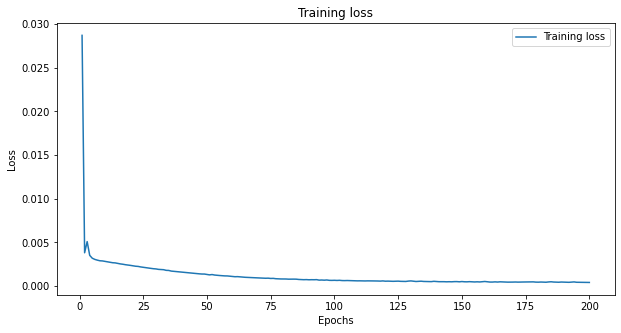

In [15]:
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 예측 결과 출력

In [16]:
train_pred = model.predict(x_train_seq)

In [17]:
pred = model.predict(x_test_seq)

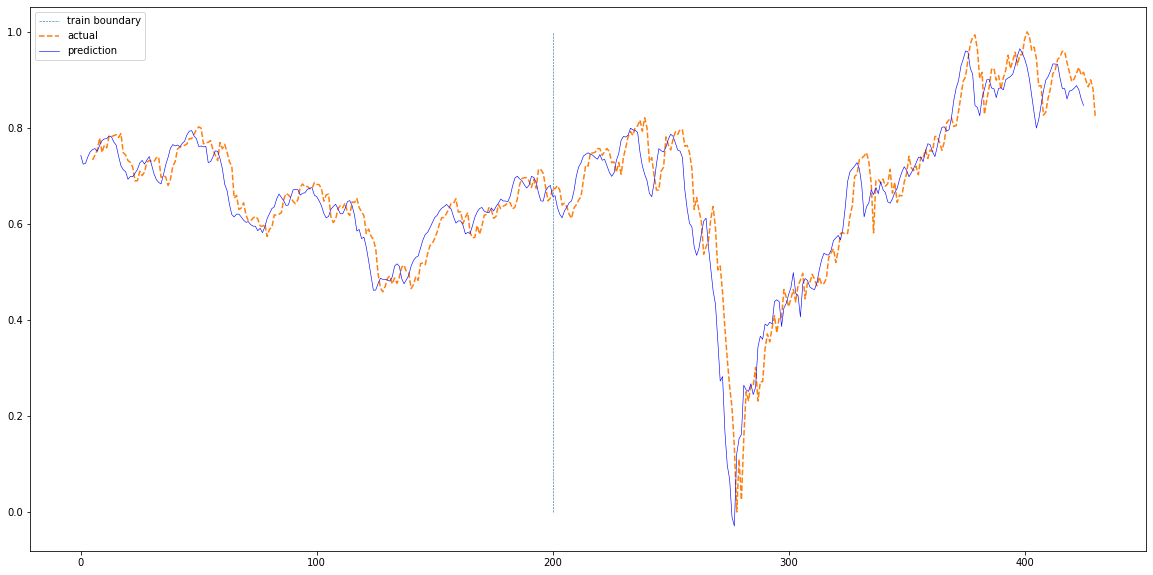

In [18]:
total_pred = np.concatenate((train_pred, pred))
actual = df['Close'][sequence_length:]

plt.figure(figsize=(20,10))
plt.plot(np.ones(100)*len(train_pred),np.linspace(0,1,100),'--', linewidth=0.6)
plt.plot(actual,'--')
plt.plot(total_pred,'b', linewidth=0.6)
plt.legend(['train boundary','actual','prediction'])
plt.show()